# Crime Hotspot Prediction in Ottawa

### About the Dataset

Summary: <br>
This data includes all founded Criminal Code of Canada offences reported to the Ottawa Police years from 2016 to 2022. Offences have been categorized according to the Uniform Crime Reporting (UCR) Survey. For privacy reasons, the location of crime occurrences has been geomasked to the nearest intersection.

The crime data published are accurate on the day that they were produced. Due to ongoing police investigations and internal data quality control efforts, this information is subject to change, including addition, deletion and reclassification of any and all data. The attribute descriptions as well as their shortened names are provided in a list below.

Date created: June 1st, 2023

Accuracy:

The Ottawa Police provides this information in good faith but provides no warranty, nor accepts any liability arising from any incorrect, incomplete or misleading information or its improper use.

Attributes:
1. ID
2. Year (Year)
3. Reported Date (ReportDate)
4. Reported Time (ReportTime)
5. Occurrence Date (OccurDate)
6. Occurrence Time (OccurTime)
7. Reported Weekday (Weekday)
8. Criminal Offence Category (OffSummary)
9. Primary Violation (PrimViolat)
10. ONS Neighbourhood 2019 (Neighbourh)
11. Ottawa Police Sector (Sector)
12. Ottawa Police Division (Division)
13. Census Tract Name (CensusTra)

Author: Ottawa Police Service
Author email: info@ottawapolice.ca
Maintainer Organization: Finance Directorate 

### Importing All required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

## Exploratory Data Analysis

In [2]:
df=pd.read_csv('Criminal_Offences_.csv')

C:\Users\afrin\AppData\Local\Temp\ipykernel_10512\1493033842.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Criminal_Offences_.csv')


#### a. Explore Dataframe

In [3]:
df.shape

(260910, 15)

In [4]:
df.head()

,X,Y,FID,Year,ReportDate,ReportTime,OccurDate,Occur_Time,Weekday,OffSummary,PrimViolat,Neighbourh,Sector,Division,CensusTra
0,-8.423236e+06,5.681209e+06,1,2022,2022/12/10 00:00:00+00,10:40:00,2022/12/10 00:00:00+00,10:20:00,Saturday,Other Criminal Code Offences (3000),Other Criminal Code (3410),Ledbury - Heron Gate - Ridgemont - Elmwood,Sector 34,EAST DIVISION,5050005.00
1,-8.424240e+06,5.682817e+06,2,2022,2022/10/11 00:00:00+00,04:55:00,2022/10/10 00:00:00+00,02:45:00,Tuesday,Crimes Against Property (2000),Theft $5000 and Under (2140),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050004.00
2,-8.424597e+06,5.682043e+06,3,2022,2022/09/28 00:00:00+00,05:30:00,2022/09/28 00:00:00+00,08:00:00,Wednesday,Crimes Against Property (2000),Theft - Motor Vehicle (2135),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050004.00
3,-8.424240e+06,5.682817e+06,4,2022,2022/08/26 00:00:00+00,11:50:00,2022/08/16 00:00:00+00,07:00:00,Friday,Crimes Against Property (2000),Break and Enter (2120),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050004.00
4,-8.423486e+06,5.681293e+06,5,2022,2022/05/12 00:00:00+00,10:55:00,2022/05/05 00:00:00+00,08:00:00,Thursday,Crimes Against Property (2000),Break and Enter (2120),Billings Bridge - Alta Vista,Sector 34,EAST DIVISION,5050005.00


In [5]:
df.Division.value_counts()

Division
Central             87084
West                47229
East                46204
CENTRAL DIVISION    37841
EAST DIVISION       21944
WEST DIVISION       20608
Name: count, dtype: int64

In [6]:
df.describe()

,X,Y,FID,Year
count,2.609100e+05,2.609100e+05,260910.000000,260910.000000
mean,-8.426629e+06,5.682776e+06,130455.500000,2019.108911
std,1.033449e+04,9.044146e+03,75318.373705,1.995302
min,-8.497819e+06,5.618838e+06,1.000000,2016.000000
25%,-8.430626e+06,5.677851e+06,65228.250000,2017.000000
50%,-8.426004e+06,5.686083e+06,130455.500000,2019.000000
75%,-8.422116e+06,5.688956e+06,195682.750000,2021.000000
max,-8.378081e+06,5.704508e+06,260910.000000,2022.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260910 entries, 0 to 260909
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   X           260910 non-null  float64
 1   Y           260910 non-null  float64
 2   FID         260910 non-null  int64  
 3   Year        260910 non-null  int64  
 4   ReportDate  260910 non-null  object 
 5   ReportTime  260910 non-null  object 
 6   OccurDate   260910 non-null  object 
 7   Occur_Time  260910 non-null  object 
 8   Weekday     260910 non-null  object 
 9   OffSummary  260910 non-null  object 
 10  PrimViolat  260910 non-null  object 
 11  Neighbourh  260910 non-null  object 
 12  Sector      260910 non-null  object 
 13  Division    260910 non-null  object 
 14  CensusTra   260910 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 29.9+ MB


#### b. Check object types

In [8]:
df.describe(include="object")

,ReportDate,ReportTime,OccurDate,Occur_Time,Weekday,OffSummary,PrimViolat,Neighbourh,Sector,Division,CensusTra
count,260910,260910,260910,260910,260910,260910,260910,260910,260910,260910,260910
unique,2557,720,3256,720,7,6,134,114,40,6,331
top,2022/02/18 00:00:00+00,12:00:00,2022/02/18 00:00:00+00,12:00:00,Wednesday,Crimes Against Property (2000),Theft $5000 and Under,Stittsville,23,Central,5050054.00
freq,206,1043,185,16224,41212,173885,73130,218742,25521,87084,8915


#### c. Exploring Target Variable

In [9]:
df['OffSummary'].value_counts().plot.bar() #unequal, can be used to stratify while data split in modeling

<Axes: xlabel='OffSummary'>

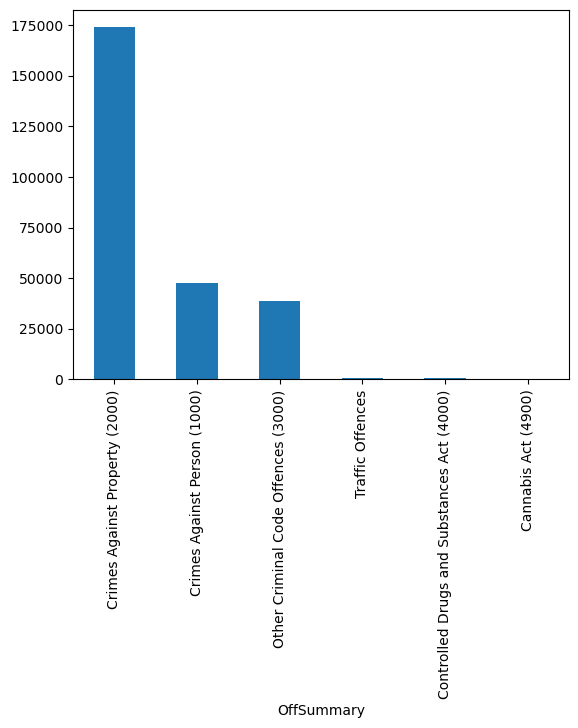

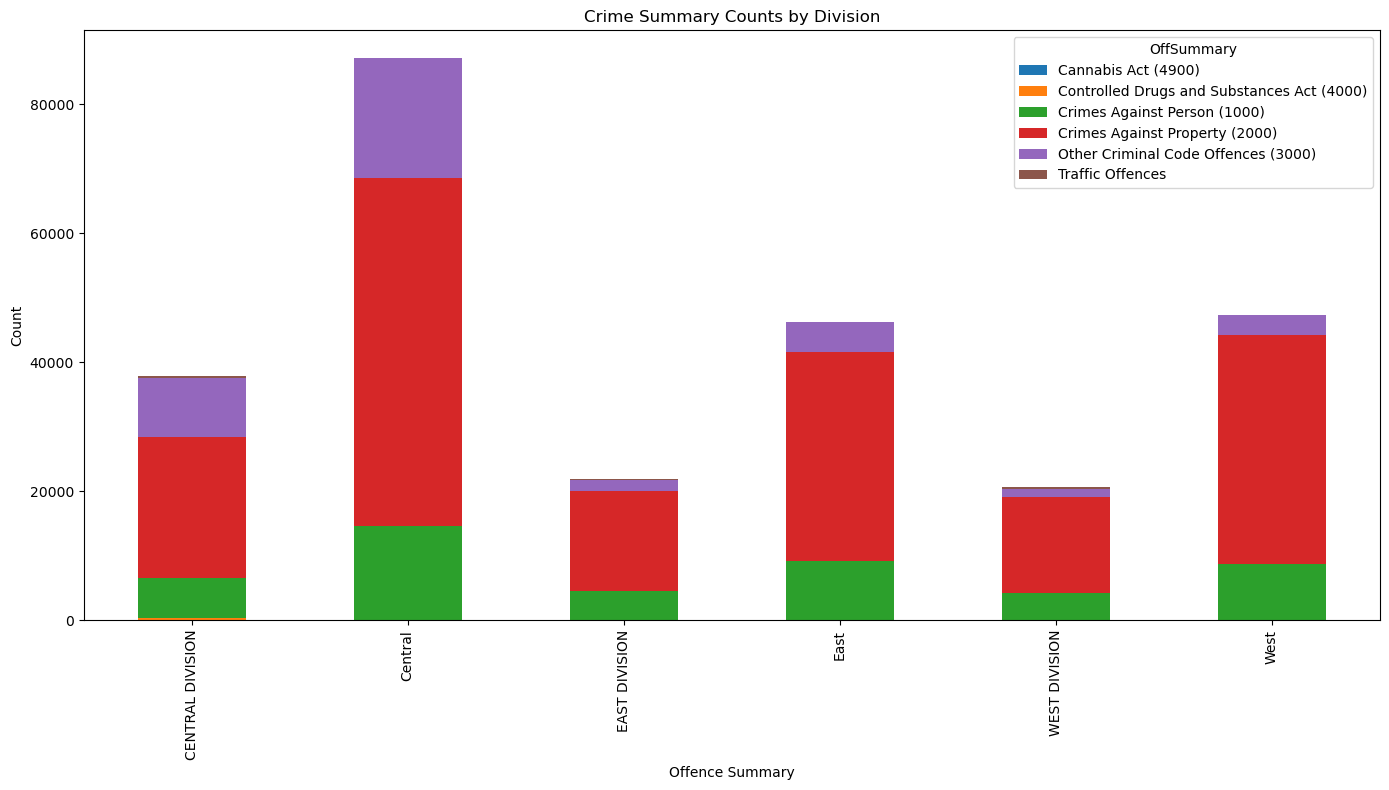

In [10]:
ct = pd.crosstab( df['Division'],df['OffSummary'])
ct.plot(kind='bar', stacked=True, figsize=(14,8))
plt.title("Crime Summary Counts by Division")
plt.xlabel("Offence Summary")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### d. Crime by Division

In [11]:
#crime trends by census tract
crime_by_tract = (
    df.groupby(['Division', 'CensusTra'])
    .size()
    .reset_index(name='Crime_Count')
    .sort_values(['Division', 'Crime_Count'], ascending=[True, False])
)

print(crime_by_tract.head(10))

            Division   CensusTra  Crime_Count
70  CENTRAL DIVISION  5050048.00         5864
59  CENTRAL DIVISION  5050037.00         2979
76  CENTRAL DIVISION  5050054.00         2791
60  CENTRAL DIVISION  5050038.00         2048
75  CENTRAL DIVISION  5050053.00         1291
85  CENTRAL DIVISION  5050101.00         1142
78  CENTRAL DIVISION  5050056.00         1018
26  CENTRAL DIVISION   5050053.0          792
67  CENTRAL DIVISION  5050045.00          738
62  CENTRAL DIVISION  5050040.00          712


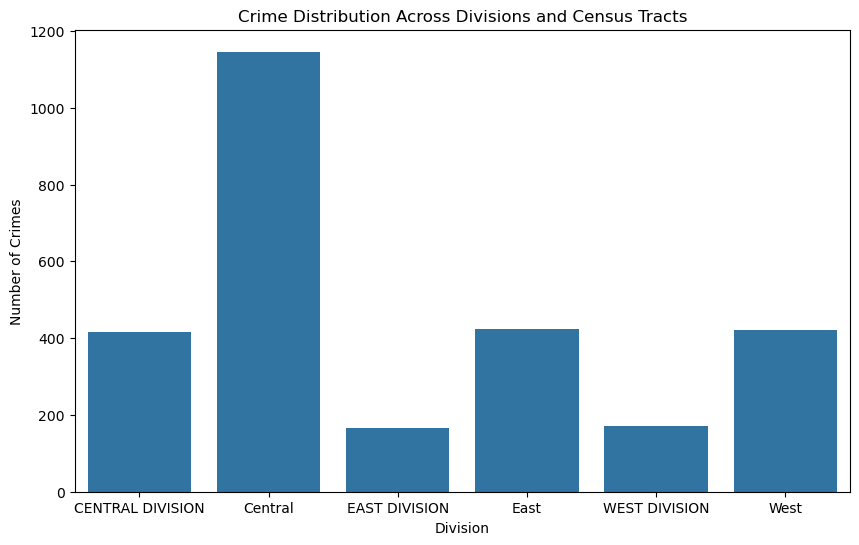

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=crime_by_tract, x='Division', y='Crime_Count', errorbar=None)
plt.title("Crime Distribution Across Divisions and Census Tracts")
plt.ylabel("Number of Crimes")
plt.show()

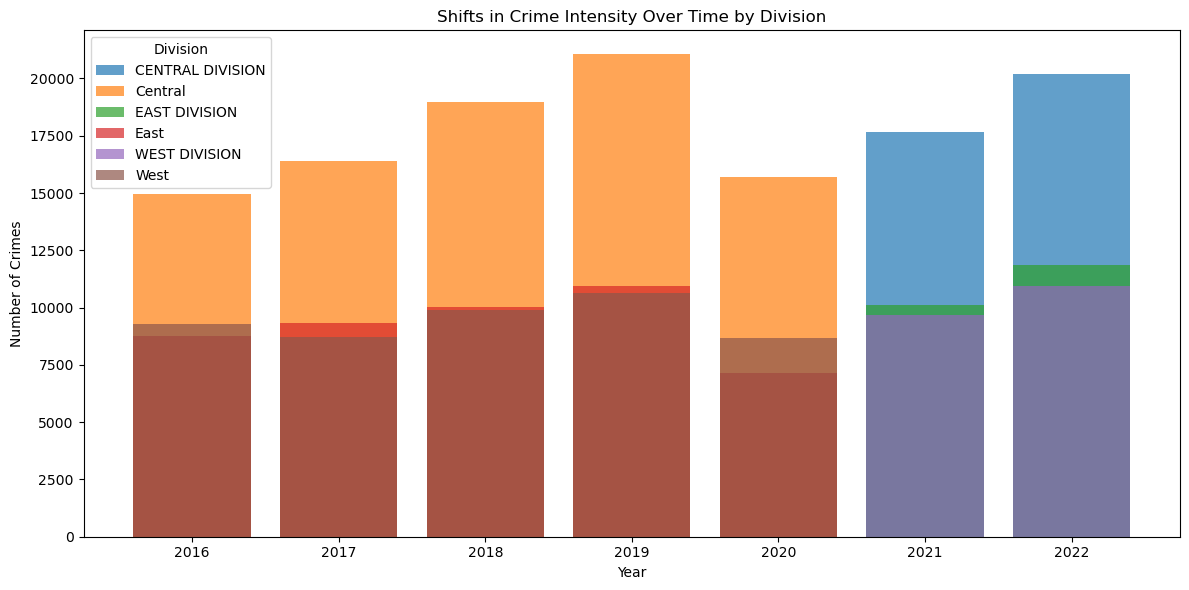

In [13]:
#regional shifts or hotspots emerging over the years

# Group data by division and year
crime_trends = df.groupby(['Division', 'Year']).size().reset_index(name='crime_count')

# Plot a bar graph
plt.figure(figsize=(12,6))
for division in crime_trends['Division'].unique():
    subset = crime_trends[crime_trends['Division'] == division]
    plt.bar(subset['Year'], subset['crime_count'], label=division, alpha=0.7)

plt.title('Shifts in Crime Intensity Over Time by Division')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Division')
plt.tight_layout()
plt.show()

#### e. Crime by Neighborhood

In [14]:
neighbour_counts = df['Neighbourh'].value_counts().reset_index()
neighbour_counts.columns = ['Neighbourh', 'Crime_Count']
print(neighbour_counts.head(10))

                                          Neighbourh  Crime_Count
0                                        Stittsville       218742
1                                         Centretown         6434
2                                      Byward Market         2081
3                                          Lowertown         1865
4                               Overbrook - McArthur         1592
5      New Barrhaven - New Development - Stonebridge         1525
6                                           Cummings         1301
7  Orleans Avalon - Notting Gate - Fallingbrook -...         1273
8                           Sandy Hill - Ottawa East          995
9                            Crestview - Meadowlands          992


In [15]:
neighbour_counts = df['Neighbourh'].value_counts().reset_index()
neighbour_counts.columns = ['Neighbourh', 'Crime_Count']
top_neigh = neighbour_counts.head(10)

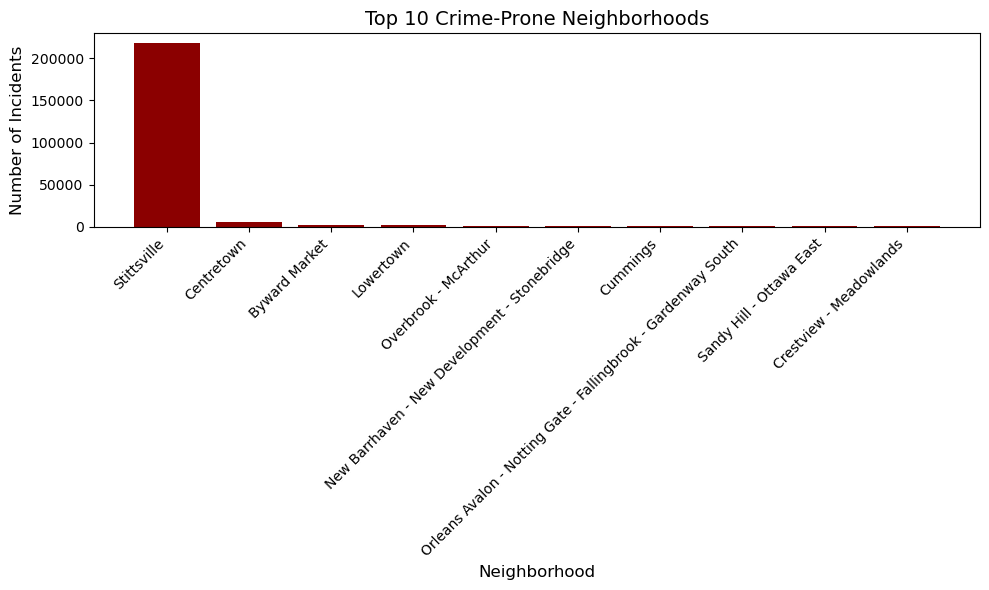

In [16]:
plt.figure(figsize=(10,6))
plt.bar(top_neigh['Neighbourh'], top_neigh['Crime_Count'], color='darkred')
plt.title("Top 10 Crime-Prone Neighborhoods", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### e. Crime by Weekday

C:\Users\afrin\AppData\Local\Temp\ipykernel_10512\1017613486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


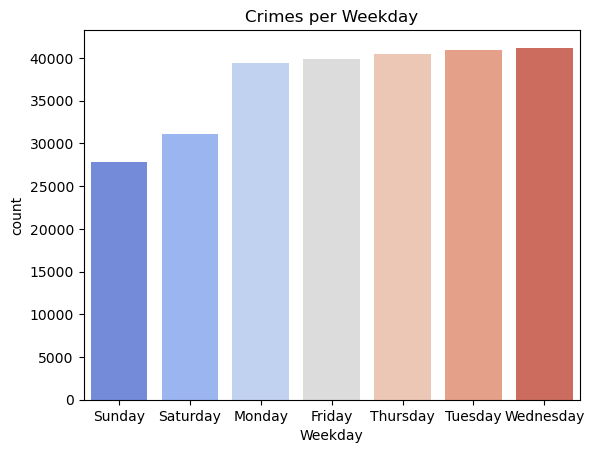

In [17]:
weekday_order = df['Weekday'].value_counts().sort_values().index

# Plot
sns.countplot(
    data=df,
    x='Weekday',
    order=weekday_order,
    palette='coolwarm', legend=False
)

plt.title('Crimes per Weekday')
plt.show()

#### f. Verifying the coordinates are for Ottawa Region Only

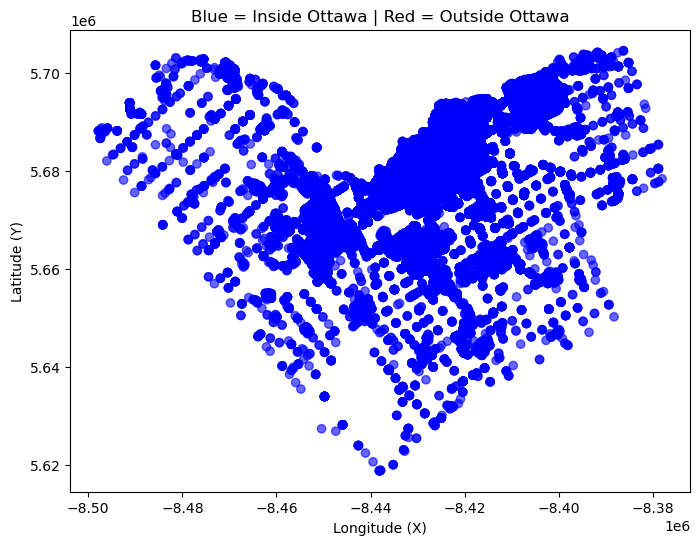

In [18]:
# Step 1: Define Ottawa’s rough coordinate box
x_min, x_max = -76.1, -75.4   # Longitude range
y_min, y_max = 45.2, 45.5     # Latitude range

# Step 2: Create a flag column
Outside_Ottawa= ~(
    (df['X'].between(x_min, x_max)) &
    (df['Y'].between(y_min, y_max))
)

# Step 3: Plot points
plt.figure(figsize=(8,6))
plt.scatter(df['X'], df['Y'], 
            c=Outside_Ottawa.map({True:'Blue', False:'Red'}), 
            alpha=0.6)
plt.title('Blue = Inside Ottawa | Red = Outside Ottawa')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.show()

## Data Cleaning

### 1. Identifying Duplicates

In [19]:
#find the duplicate rows 
duplicates = df.duplicated() # No duplicates
duplicates[duplicates==True]

Series([], dtype: bool)

### 2. Check Missing Values

In [20]:
df.isna().sum() #no nulls

X             0
Y             0
FID           0
Year          0
ReportDate    0
ReportTime    0
OccurDate     0
Occur_Time    0
Weekday       0
OffSummary    0
PrimViolat    0
Neighbourh    0
Sector        0
Division      0
CensusTra     0
dtype: int64

### 3. Check Outliers

In [21]:
df.describe() #no outliers observed

,X,Y,FID,Year
count,2.609100e+05,2.609100e+05,260910.000000,260910.000000
mean,-8.426629e+06,5.682776e+06,130455.500000,2019.108911
std,1.033449e+04,9.044146e+03,75318.373705,1.995302
min,-8.497819e+06,5.618838e+06,1.000000,2016.000000
25%,-8.430626e+06,5.677851e+06,65228.250000,2017.000000
50%,-8.426004e+06,5.686083e+06,130455.500000,2019.000000
75%,-8.422116e+06,5.688956e+06,195682.750000,2021.000000
max,-8.378081e+06,5.704508e+06,260910.000000,2022.000000


## Feature Engineering

### 1. Date and Time Columns

Splitting ReportDate, ReportTime, OccurDate and OccurTime into sub-columns

In [22]:
df['ReportDate2'] = pd.to_datetime(df['ReportDate'], errors='coerce')
# Extract year, month, day as integers
df['ReportDate_year'] = df['ReportDate2'].dt.year
df['ReportDate_month'] = df['ReportDate2'].dt.month
df['ReportDate_day'] = df['ReportDate2'].dt.day

# Convert ReportTime to datetime (time only)
df['ReportTime2'] = pd.to_datetime(df['ReportTime'], format='%H:%M:%S', errors='coerce')
# Extract hour, minute, second as integers
df['ReportTime_hour'] = df['ReportTime2'].dt.hour
df['ReportTime_minute'] = df['ReportTime2'].dt.minute
df['ReportTime_second'] = df['ReportTime2'].dt.second

# Convert OccurDate to datetime
df['OccurDate2'] = pd.to_datetime(df['OccurDate'], errors='coerce')
# Extract year, month, day as integers
df['OccurDate_year'] = df['OccurDate2'].dt.year
df['OccurDate_month'] = df['OccurDate2'].dt.month
df['OccurDate_day'] = df['OccurDate2'].dt.day

# Convert Occur_Time to datetime (time only)
df['OccurTime2'] = pd.to_datetime(df['Occur_Time'], format='%H:%M:%S', errors='coerce')
# Extract hour, minute, second as integers
df['OccurTime_hour'] = df['OccurTime2'].dt.hour
df['OccurTime_minute'] = df['OccurTime2'].dt.minute
df['OccurTime_second'] = df['OccurTime2'].dt.second

Drop copy of the original columns that were used to split dates and times

In [23]:
df.drop('ReportDate2',inplace=True,axis=1)
df.drop('ReportTime2',inplace=True,axis=1)
df.drop('OccurDate2',inplace=True,axis=1)
df.drop('OccurTime2',inplace=True,axis=1)

Drop original columns of date and time

In [24]:
df.drop('ReportDate',inplace=True,axis=1)
df.drop('ReportTime',inplace=True,axis=1)
df.drop('OccurDate',inplace=True,axis=1)
df.drop('Occur_Time',inplace=True,axis=1)

Count crimes by hour

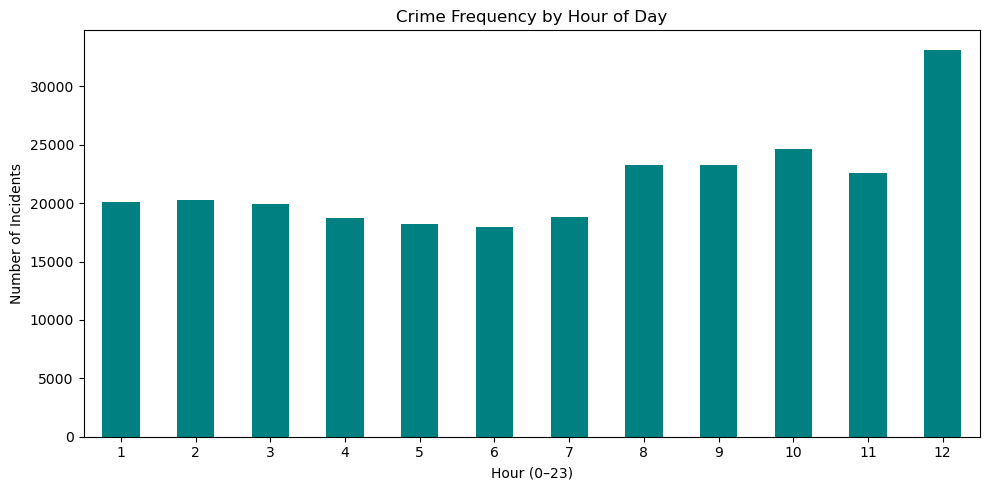

In [25]:
# 
hourly_counts = df['OccurTime_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar', color='teal')
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


What It Means
- The spike at hour 12 suggests that crime incidents peak around midday.
- This could be due to:
- Increased public activity (lunch breaks, shopping, transit)
- More opportunities for property crimes or interpersonal conflicts
- Business hours when fraud or theft might occur

### 2. Combining the divisions into groups

In [26]:
# Standardize Division column
df['Division'] = df['Division'].str.upper().str.strip()

# Create a mapping dictionary
division_map = {
    'EAST DIVISION': 'EAST',
    'CENTRAL DIVISION': 'CENTRAL',
    'WEST DIVISION': 'WEST'
}

# Replace values using the dictionary
df['Division'] = df['Division'].replace(division_map)

# Now verify
print(df['Division'].value_counts())

Division
CENTRAL    124925
EAST        68148
WEST        67837
Name: count, dtype: int64


### 3. Converting categorical columns to numeric

#### Check Categorical columns

In [27]:
df.describe(include='object')

,Weekday,OffSummary,PrimViolat,Neighbourh,Sector,Division,CensusTra
count,260910,260910,260910,260910,260910,260910,260910
unique,7,6,134,114,40,3,331
top,Wednesday,Crimes Against Property (2000),Theft $5000 and Under,Stittsville,23,CENTRAL,5050054.00
freq,41212,173885,73130,218742,25521,124925,8915


#### a. Sector (using to_numeric)

In [28]:
# Convert to string & uppercase to avoid case issues
df['Sector'] = df['Sector'].astype(str).str.upper().str.strip()

# Remove the word SECTOR if it exists
df['Sector'] = df['Sector'].str.replace('SECTOR', '').str.strip() #helps to convert sector11 and 11 into 1 category

# Convert to numeric
df['Sector'] = pd.to_numeric(df['Sector'], errors='coerce').astype('Int64')

# Check the results
print(df['Sector'].unique())

<IntegerArray>
[  34,   35,   15,   17,   32,   16,   13,   23,   22,   21,   14,   31,   33,
   25,   24,   36,   12,   37,   11, <NA>,  408]
Length: 21, dtype: Int64


Sector has 1 outlier: 408 and Nan values

In [29]:
df['Sector'].isna().value_counts()

Sector
False    260898
True         12
Name: count, dtype: int64

Sector has 12 nulls: Nan Fake Calls, needs to drop

In [30]:
df['Sector'].unique()

<IntegerArray>
[  34,   35,   15,   17,   32,   16,   13,   23,   22,   21,   14,   31,   33,
   25,   24,   36,   12,   37,   11, <NA>,  408]
Length: 21, dtype: Int64

In [31]:
df = df.dropna(subset=['Sector'])

In [32]:
df['Sector'].value_counts()

Sector
23     37780
24     32588
25     20911
21     17887
31     15918
22     15808
13     15680
17     14658
14     13595
32     13357
33     12522
35     12072
16     11176
34      9954
15      8184
12      2580
36      2425
11      1928
37      1874
408        1
Name: count, dtype: Int64

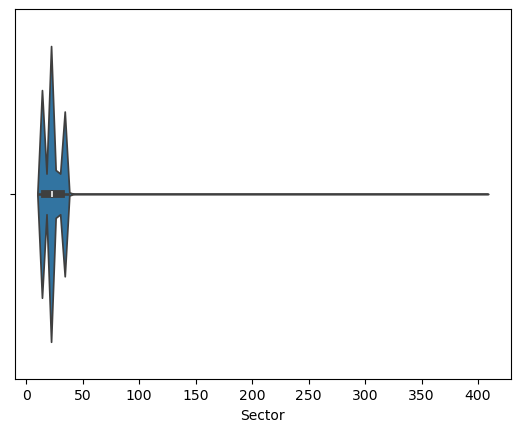

In [33]:
sns.violinplot(df.Sector, orient='h')
plt.show()

In [34]:
df = df[df['Sector'] != 408] 

408 outlier is removed form dataset

#### b. Neighbourh, Weekday, OffSummary, PrimViolat, Division (using Label Encoder)

Note: <br> 
Although its a possibility that label encoder might cause some bias with higher numbers in categories but we prefer it because these columns have 3 or more categories which would result in 15-20 new columns. Therefore we avoid using get_dummies() function. 

Prerequisite: Saving Actual values of our Target variable before encoding, to identify which number refers to which category

In [35]:
#for future help
le = LabelEncoder()
Target = le.fit_transform(df['OffSummary'])
mapping_target = pd.DataFrame({
    'OffSummary': le.classes_,
    'encoded_value': le.transform(le.classes_)
})
print(mapping_target.head())

                                   OffSummary  encoded_value
0                         Cannabis Act (4900)              0
1  Controlled Drugs and Substances Act (4000)              1
2                Crimes Against Person (1000)              2
3              Crimes Against Property (2000)              3
4         Other Criminal Code Offences (3000)              4


In [36]:
le = LabelEncoder()
df['Weekday']	= le.fit_transform(df['Weekday'])
df['OffSummary']= le.fit_transform(df['OffSummary'])	
df['PrimViolat']	= le.fit_transform(df['PrimViolat'])
df['Neighbourh']= le.fit_transform(df['Neighbourh'])
df['Division']	= le.fit_transform(df['Division'])


In [37]:
df.head()

,X,Y,FID,Year,Weekday,OffSummary,PrimViolat,Neighbourh,Sector,Division,...,ReportDate_day,ReportTime_hour,ReportTime_minute,ReportTime_second,OccurDate_year,OccurDate_month,OccurDate_day,OccurTime_hour,OccurTime_minute,OccurTime_second
0,-8.423236e+06,5.681209e+06,1,2022,2,4,52,65,34,1,...,10,10,40,0,2022,12,10,10,20,0
1,-8.424240e+06,5.682817e+06,2,2022,5,3,112,7,34,1,...,11,4,55,0,2022,10,10,2,45,0
2,-8.424597e+06,5.682043e+06,3,2022,6,3,116,7,34,1,...,28,5,30,0,2022,9,28,8,0,0
3,-8.424240e+06,5.682817e+06,4,2022,0,3,19,7,34,1,...,26,11,50,0,2022,8,16,7,0,0
4,-8.423486e+06,5.681293e+06,5,2022,4,3,19,7,34,1,...,12,10,55,0,2022,5,5,8,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260897 entries, 0 to 260909
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  260897 non-null  float64
 1   Y                  260897 non-null  float64
 2   FID                260897 non-null  int64  
 3   Year               260897 non-null  int64  
 4   Weekday            260897 non-null  int64  
 5   OffSummary         260897 non-null  int64  
 6   PrimViolat         260897 non-null  int64  
 7   Neighbourh         260897 non-null  int64  
 8   Sector             260897 non-null  Int64  
 9   Division           260897 non-null  int64  
 10  CensusTra          260897 non-null  object 
 11  ReportDate_year    260897 non-null  int32  
 12  ReportDate_month   260897 non-null  int32  
 13  ReportDate_day     260897 non-null  int32  
 14  ReportTime_hour    260897 non-null  int32  
 15  ReportTime_minute  260897 non-null  int32  
 16  ReportT

### 4. Drop irrelevant features

In [39]:
df.drop('FID',inplace=True, axis=1)

In [40]:
df.drop('CensusTra', inplace=True, axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260897 entries, 0 to 260909
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  260897 non-null  float64
 1   Y                  260897 non-null  float64
 2   Year               260897 non-null  int64  
 3   Weekday            260897 non-null  int64  
 4   OffSummary         260897 non-null  int64  
 5   PrimViolat         260897 non-null  int64  
 6   Neighbourh         260897 non-null  int64  
 7   Sector             260897 non-null  Int64  
 8   Division           260897 non-null  int64  
 9   ReportDate_year    260897 non-null  int32  
 10  ReportDate_month   260897 non-null  int32  
 11  ReportDate_day     260897 non-null  int32  
 12  ReportTime_hour    260897 non-null  int32  
 13  ReportTime_minute  260897 non-null  int32  
 14  ReportTime_second  260897 non-null  int32  
 15  OccurDate_year     260897 non-null  int32  
 16  OccurDa

In [42]:
# Save the data as 'Criminal_Offences_final_cleaned.csv'
df.to_csv('Criminal_Offences_final_cleaned.csv', index=None)

## Data Partition and Modeling

In [43]:
# Seperate the input features and target variable
x = df.drop('OffSummary',axis=1)
y = df.OffSummary
y.head(2)

0    4
1    3
Name: OffSummary, dtype: int64

# 80:20

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y) #stratify is class variable, Target column has different proportion

In [45]:
df.shape

(260897, 21)

In [46]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((208717, 20), (52180, 20), (208717,), (52180,))

## Normalize the Variables

In [47]:
# scale the data using min-max scalar
scale = MinMaxScaler()

In [48]:
xtrain.head(2)

,X,Y,Year,Weekday,PrimViolat,Neighbourh,Sector,Division,ReportDate_year,ReportDate_month,ReportDate_day,ReportTime_hour,ReportTime_minute,ReportTime_second,OccurDate_year,OccurDate_month,OccurDate_day,OccurTime_hour,OccurTime_minute,OccurTime_second
25306,-8.432186e+06,5.683899e+06,2022,0,114,109,21,0,2022,4,8,11,22,0,2022,4,4,10,41,0
193188,-8.413959e+06,5.693714e+06,2017,0,36,102,32,1,2017,6,30,7,21,0,2017,5,30,12,0,0


In [49]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest) #do not fit, only transform based on trainset(avoid data leaking):use min and max values from the train set to compute minmax scale

## Decision tree Predictions

In [50]:
# Decision Tree Model
dtmodel = DecisionTreeClassifier().fit(xtrain_scaled, ytrain)

In [51]:
ypred = dtmodel.predict(xtest_scaled)

dt_score1=accuracy_score(ypred, ytest)

### Tuning Hyperparameters DT

In [52]:
# Let's list the tunable hyperparameters for Random Forest algorithm
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [53]:
dtmodel = DecisionTreeClassifier(max_features=10,max_depth=3).fit(xtrain_scaled, ytrain)
ypred = dtmodel.predict(xtest_scaled)
dt_score1_tuned=accuracy_score(ypred, ytest)

## Random Forest Predictions

In [54]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain_scaled,ytrain)

RandomForestClassifier()

In [55]:
ypred = rfmodel.predict(xtest_scaled)

rf_score1=accuracy_score(ypred, ytest)

### Tuning Hyperparameters RF

In [56]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100.

* The second one is max_features trying 'sqrt'

* The third one is Max_depth, we try 4

In [57]:
rfmodel = RandomForestClassifier(n_estimators=100,
                                 max_depth=4,
                                 max_features='sqrt')
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

rf_score1_tuned= accuracy_score(ypred, ytest)
print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))


0.8282866998850135 

[[    0     0     0     4     0     0]
 [    0     0     0    88     1     0]
 [    0     0  5026  4304   146     0]
 [    0     0     1 34732    43     0]
 [    0     0     0  4229  3462     0]
 [    0     0     0   144     0     0]]


In [58]:
# plot a feature importance chart
rfmodel.feature_importances_

array([8.34101287e-02, 8.26648948e-02, 6.41472287e-04, 4.85608912e-04,
       6.29324221e-01, 4.70977954e-03, 1.01611428e-01, 3.45281713e-02,
       3.21450157e-04, 1.34353629e-04, 7.95193161e-05, 1.20064428e-02,
       1.52855704e-03, 0.00000000e+00, 3.98492573e-03, 3.07515614e-04,
       8.33586251e-04, 1.38051808e-02, 2.96227638e-02, 0.00000000e+00])

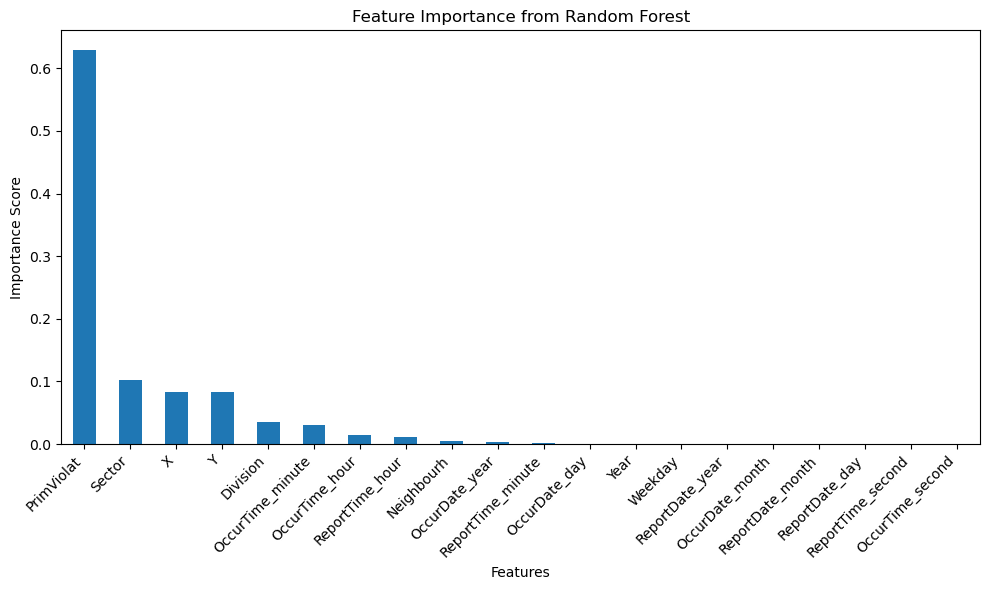

In [59]:
# Get feature importances
importances = rfmodel.feature_importances_

# Create a pandas Series for easier handling and sorting
feature_importances = pd.Series(importances, index=x.columns)

# Sort the importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Cross Validation

### For Random Forest

In [60]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)
rf_score_cv1=rf_scores.mean()
# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())


Accuracy scores: [0.81475182 0.81408107 0.82710874 0.8157775  0.82607862]
Mean accuracy: 0.8195595485092774
Standard deviation: 0.005777898157100096


# 70:30

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, stratify=y) #stratify is class variable, Target has different proportion

In [62]:
df.shape

(260897, 21)

In [63]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((182627, 20), (78270, 20), (182627,), (78270,))

## Normalize the Variables

In [64]:
scale = MinMaxScaler()

In [65]:
xtrain.head(2)

,X,Y,Year,Weekday,PrimViolat,Neighbourh,Sector,Division,ReportDate_year,ReportDate_month,ReportDate_day,ReportTime_hour,ReportTime_minute,ReportTime_second,OccurDate_year,OccurDate_month,OccurDate_day,OccurTime_hour,OccurTime_minute,OccurTime_second
229701,-8.430287e+06,5.661556e+06,2019,5,36,102,16,2,2019,4,30,9,28,0,2019,4,30,9,28,0
179453,-8.432650e+06,5.682648e+06,2020,4,36,102,21,0,2020,10,15,6,50,0,2020,10,10,12,0,0


In [66]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest) #do not fit, only transform based on trainset(avoid data leaking):use min and max values from the train set to compute minmax scale

## Decision tree Predictions

In [67]:
# Decision Tree Model
dtmodel = DecisionTreeClassifier().fit(xtrain_scaled, ytrain)

In [68]:
ypred = dtmodel.predict(xtest_scaled)

dt_score2=accuracy_score(ypred, ytest)

### Tuning Hyperparameters DT

In [69]:
# Let's list the tunable hyperparameters for Random Forest algorithm
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [70]:
dtmodel = DecisionTreeClassifier(max_features=10,max_depth=3).fit(xtrain_scaled, ytrain)
ypred = dtmodel.predict(xtest_scaled)
dt_score2_tuned=accuracy_score(ypred, ytest)

## Random Forest Predictions

In [71]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain_scaled,ytrain)

RandomForestClassifier()

In [72]:
ypred = rfmodel.predict(xtest_scaled)

rf_score2=accuracy_score(ypred, ytest)

### Tuning Hyperparameters RF

In [73]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
rfmodel = RandomForestClassifier(n_estimators=100,
                                 max_depth=4,
                                 max_features='sqrt')
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

rf_score2_tuned= accuracy_score(ypred, ytest)
print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))


0.8270090711639198 

[[    0     0     0     7     0     0]
 [    0     0     0   130     3     0]
 [    0     0  7472  6552   190     0]
 [    0     0    72 52073    19     0]
 [    0     0     0  6351  5185     0]
 [    0     0     0   213     3     0]]


In [75]:
# plot a feature importance chart
rfmodel.feature_importances_

array([9.84072996e-02, 9.09530246e-02, 4.49742231e-04, 5.53955254e-04,
       6.33287945e-01, 7.58331439e-03, 8.43336423e-02, 3.16047313e-02,
       5.94048310e-04, 2.08057971e-04, 1.11107119e-04, 6.73078628e-03,
       1.73950151e-03, 0.00000000e+00, 4.55965631e-03, 2.53174231e-04,
       5.44155062e-04, 1.20249546e-02, 2.60609039e-02, 0.00000000e+00])

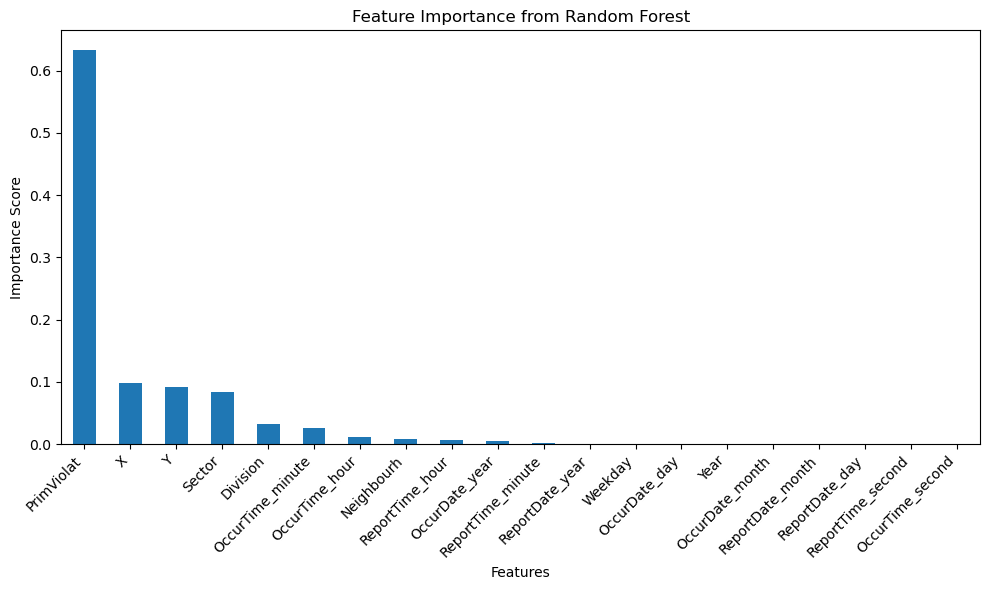

In [76]:
# Get feature importances
importances = rfmodel.feature_importances_

# Create a pandas Series for easier handling and sorting
feature_importances = pd.Series(importances, index=x.columns)

# Sort the importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Cross Validation

### For Random Forest

In [77]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)
rf_score_cv2=rf_scores.mean()
# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())


Accuracy scores: [0.82220884 0.81919728 0.82715948 0.82031485 0.82510609]
Mean accuracy: 0.8227973092067259
Standard deviation: 0.0029606782376139533


# 85:15

In [78]:
# splitting the data in training and testing set
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.15, stratify=y) #stratify is class variable, Target has different proportion

In [79]:
df.shape

(260897, 21)

In [80]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((221762, 20), (39135, 20), (221762,), (39135,))

## Normalize the Variables

In [81]:
# scale the data using min-max scalar
scale = MinMaxScaler()

In [82]:
xtrain.head(2)

,X,Y,Year,Weekday,PrimViolat,Neighbourh,Sector,Division,ReportDate_year,ReportDate_month,ReportDate_day,ReportTime_hour,ReportTime_minute,ReportTime_second,OccurDate_year,OccurDate_month,OccurDate_day,OccurTime_hour,OccurTime_minute,OccurTime_second
3780,-8.426101e+06,5.688059e+06,2022,4,63,24,23,0,2022,3,3,9,54,0,2022,3,2,9,54,0
136140,-8.424550e+06,5.689998e+06,2020,6,3,102,24,0,2020,6,24,11,44,0,2020,6,24,11,44,0


In [83]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest) #do not fit, only transform based on trainset(avoid data leaking):use min and max values from the train set to compute minmax scale

## Decision tree Predictions

In [84]:
# Decision Tree Model
dtmodel = DecisionTreeClassifier().fit(xtrain_scaled, ytrain)

In [85]:
ypred = dtmodel.predict(xtest_scaled)

dt_score3=accuracy_score(ypred, ytest)

### Tuning Hyperparameters DT

In [86]:
# Let's list the tunable hyperparameters for Random Forest algorithm
dtmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [87]:
dtmodel = DecisionTreeClassifier(max_features=10,max_depth=3).fit(xtrain_scaled, ytrain)
ypred = dtmodel.predict(xtest_scaled)
dt_score3_tuned=accuracy_score(ypred, ytest)

## Random Forest Predictions

In [88]:
rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain_scaled,ytrain)

RandomForestClassifier()

In [89]:
ypred = rfmodel.predict(xtest_scaled)

rf_score3=accuracy_score(ypred, ytest)

### Tuning Hyperparameters RF

In [90]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [91]:
rfmodel = RandomForestClassifier(n_estimators=100,
                                 max_depth=4,
                                 max_features='sqrt')
rfmodel.fit(xtrain, ytrain)

# predict on xtest
ypred = rfmodel.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix

rf_score3_tuned= accuracy_score(ypred, ytest)
print(accuracy_score(ypred, ytest),'\n')
print(confusion_matrix(ytest, ypred))


0.824939312635748 

[[    0     0     0     3     0     0]
 [    0     0     0    66     1     0]
 [    0     0  3782  3251    74     0]
 [    0     0    65 25950    67     0]
 [    0     0     0  3216  2552     0]
 [    0     0     0   108     0     0]]


In [92]:
# plot a feature importance chart
rfmodel.feature_importances_

array([9.30619279e-02, 9.07220370e-02, 7.04204039e-04, 3.28276350e-04,
       6.31065174e-01, 6.37424619e-03, 8.28142507e-02, 3.24051411e-02,
       6.70505542e-04, 1.55841540e-04, 1.80267807e-04, 8.28941537e-03,
       1.36991560e-03, 0.00000000e+00, 6.33694905e-03, 2.59359992e-04,
       9.40706993e-04, 1.17685664e-02, 3.25532145e-02, 0.00000000e+00])

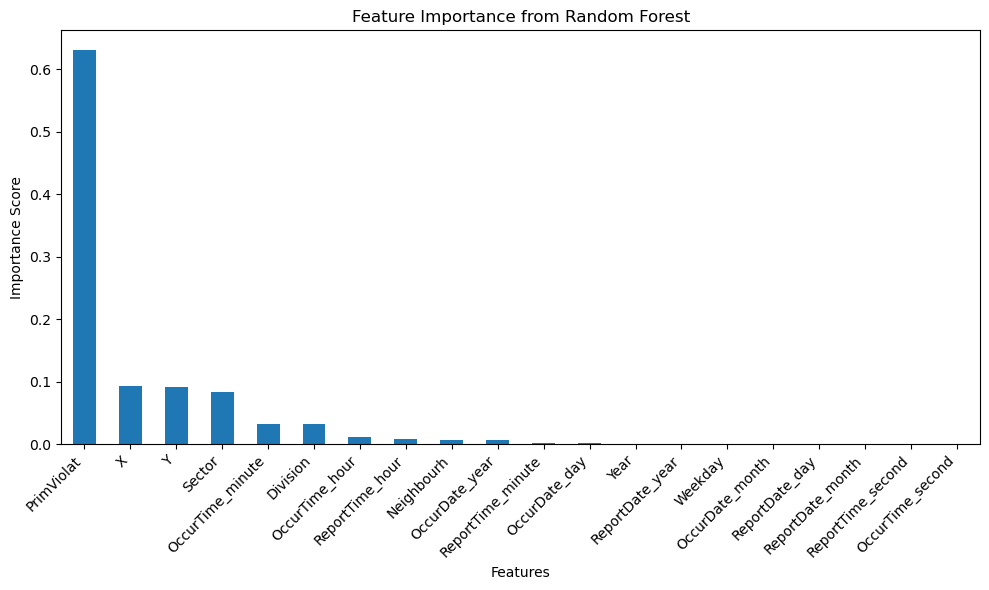

In [93]:
# Get feature importances
importances = rfmodel.feature_importances_

# Create a pandas Series for easier handling and sorting
feature_importances = pd.Series(importances, index=x.columns)

# Sort the importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Cross Validation

### For Random Forest

In [94]:
# Set up a KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rfmodel, xtrain_scaled, ytrain, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores:", rf_scores)
rf_score_cv3=rf_scores.mean()
# Print the mean accuracy and standard deviation of the model
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())


Accuracy scores: [0.81881722 0.81712624 0.82789953 0.82339015 0.82431457]
Mean accuracy: 0.8223095421020308
Standard deviation: 0.003885841866181166


## Listing Accuracy Results of All Models

In [95]:
accuracy_scores={'80-20 DT':dt_score1,'70-30 DT':dt_score2,'85-15 DT':dt_score3, 
                 '80-20 DT Tuned':dt_score1_tuned,'70-30 DT Tuned':dt_score2_tuned,'85-15 DT Tuned':dt_score3_tuned,
                 '80-20 RF':rf_score1,'70-30 RF':rf_score2,'85-15 RF':rf_score3,
                 '80-20 RF Tuned':rf_score1_tuned,'70-30 RF Tuned':rf_score2_tuned,'85-15 RF Tuned':rf_score3_tuned, 
                 '80-20 RF CV':rf_score_cv1,'70-30 RF CV': rf_score_cv2, '85-15 RF CV': rf_score_cv3}

In [96]:
sorted(accuracy_scores.items(), key=lambda val: val[1], reverse=True)#sorts dictionary, takes key-value pair as items, 
                                                       #then sorts by values, key param is used to tell sorted function to take 2nd element i.e. value not the key for sorting

[('70-30 DT', 0.999987223712789),
 ('85-15 DT', 0.9999744474255782),
 ('80-20 DT', 0.9999616711383672),
 ('85-15 RF', 0.9945828542225629),
 ('80-20 RF', 0.9943081640475278),
 ('70-30 RF', 0.9932924492142583),
 ('80-20 RF Tuned', 0.8282866998850135),
 ('70-30 RF Tuned', 0.8270090711639198),
 ('85-15 RF Tuned', 0.824939312635748),
 ('70-30 RF CV', np.float64(0.8227973092067259)),
 ('85-15 RF CV', np.float64(0.8223095421020308)),
 ('80-20 RF CV', np.float64(0.8195595485092774)),
 ('85-15 DT Tuned', 0.8049571994378434),
 ('70-30 DT Tuned', 0.7649418678931902),
 ('80-20 DT Tuned', 0.7629359908010732)]

## Using Best Data Split for Neural Networks (70:30)

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, stratify=y) #stratify is class variable, Target has different proportion

In [98]:
df.shape

(260897, 21)

In [99]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((182627, 20), (78270, 20), (182627,), (78270,))

## Normalize the Variables

In [100]:
scale = MinMaxScaler()

In [101]:
xtrain.head(2)

,X,Y,Year,Weekday,PrimViolat,Neighbourh,Sector,Division,ReportDate_year,ReportDate_month,ReportDate_day,ReportTime_hour,ReportTime_minute,ReportTime_second,OccurDate_year,OccurDate_month,OccurDate_day,OccurTime_hour,OccurTime_minute,OccurTime_second
177232,-8.428037e+06,5.685026e+06,2020,1,98,102,22,0,2020,4,20,9,9,0,2020,4,20,9,9,0
233427,-8.428624e+06,5.642072e+06,2021,0,3,102,12,2,2021,4,16,8,13,0,2021,4,16,8,13,0


In [102]:
# Fit-transform on train data
xtrain_scaled = scale.fit_transform(xtrain)
xtest_scaled = scale.transform(xtest) #do not fit, only transform based on trainset(avoid data leaking):use min and max values from the train set to compute minmax scale

Base Model

In [103]:
MLP = MLPClassifier()
MLP.fit(xtrain_scaled,ytrain)
# make predictions on train
ypred_train = MLP.predict(xtrain_scaled)

# check accuracy of the model
accuracy_score(ytrain, ypred_train)

C:\Users\afrin\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9920876978759986

In [106]:
# make Predictions
ypred = MLP.predict(xtest_scaled)

# check accuracy of the model
NN_score=accuracy_score(ytest, ypred)

Hyperparameter Tuning

In [107]:
MLP = MLPClassifier(hidden_layer_sizes=(3), batch_size=50, max_iter=200, random_state=123)
MLP.fit(xtrain_scaled,ytrain)
# make predictions on train
ypred_train = MLP.predict(xtrain_scaled)

# check accuracy of the model
accuracy_score(ytrain, ypred_train)

0.9060544169263033

In [108]:
# make Predictions
ypred = MLP.predict(xtest_scaled)

# check accuracy of the model
NN_score_tuned=accuracy_score(ytest, ypred)

In [109]:
print("Neural Network Accuracy Scores")
print("Default Model", NN_score)
print("Tuned Model",NN_score_tuned)

Neural Network Accuracy Scores
Default Model 0.9056726715216558
Tuned Model 0.9056726715216558


## Conclusion

 **Best Model**

 Decision Tree models consistently achieved the highest scores, exceeding 0.999 across all splits, making them the top-performing models. Random Forest models showed strong but slightly lower performance, with default scores around 0.993 and reduced accuracy for tuned and cross-validated versions. Neural Network models, trained on the 70:30 split, achieved accuracies of approximately 0.990 for the default model and 0.906 for the tuned model. These results highlighted Decision Trees as the most effective model, which guided the choice of the 70:30 split for Neural Network training and further analysis. 

 **Best Features**
 The top five features contributing most to predicting crimes were identified as PrimViolat, X and Y (latitude and longitude), Sector, Division, and the Time the crime occurred. These features were found to have the greatest impact on model performance and were critical for understanding the factors influencing crime predictions. 

*END*